## Lab 2a: Exploring wildfire occurrence data in Python

**Objectives:**
   * Explore a large wildfire dataset using `pandas` and `geopandas`.
   * Query `pandas DataFrames` and find descriptive statistics
   * Filter and aggregate `pandas DataFrames`
   * Plot time-series data

### Check for any updates in course materials

Before we start this assignment, we need to check whether there are any updates to the original course repository. We can do this by adding the original repository (the one we forked) as a *remote*. Command line users can do this by running:

<code>git remote add upstream https://github.com/JohnnyRyan1/geospatial-data-science</code>

Then fetch and merge the updated course content by running:

<code>git fetch upstream</code>

<code>git merge upstream/master master</code>

GitHub Desktop users should first click the **Fetch origin** button to check for new changes. Then click the triangle symbol next to **Current branch: master**, click **Choose a branch to merge into master**, click **upstream/master** from **Other branches** and click **Create a merge commit**. 

Any new updates to the course repository will now be available in your local repository.

### Create a new environment and launch the notebook

There is an `environment.yml` file in each lab folder. This file contains a list of packages required for completing the assignments. The `environment.yml` file in this lab, for example, includes the `geopandas` package that is really useful for reading, analyzing, and writing vector data.  

We can install this environment using the instructions in Lab 1 but we will repeat them here as well. Navigate to the `labs/lab2` folder (either from the terminal for Linux and Mac users or from the **CMD.exe Prompt** launched from **Anaconda Navigator** for Windows users) and run:

`conda env create -f environment.yml`

Activate this environment by running:

`conda activate lab1`

Now launch the notebook by running:

`jupyter notebook 02a_wildfire_dataset.ipynb`

### Download the data for the lab

We will be using a wildfire dataset for 1992-2018 period compiled from US federal, state, and local reporting systems by the Forest Service. More info can be found here: https://www.fs.usda.gov/rds/archive/Catalog/RDS-2013-0009.5. Since the max file size for GitHub is 2 GB, the lab data will be available on Dropbox. See Slack (or Canvas) for the Dropbox link. 

Once you have launched the notebook and downloaded the data, we are ready to begin...

In [114]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
# Define data filepath
pathname = '/path/to/wildfire_data/'

# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame

### Some basic querying

In [8]:
# Find column labels
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYS', 'SOURCE_S_1',
       'NWCG_REPOR', 'NWCG_REP_1', 'NWCG_REP_2', 'SOURCE_REP', 'SOURCE_R_1',
       'LOCAL_FIRE', 'LOCAL_INCI', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PL',
       'ICS_209__1', 'MTBS_ID', 'MTBS_FIRE_', 'COMPLEX_NA', 'FIRE_YEAR',
       'DISCOVERY_', 'DISCOVER_1', 'DISCOVER_2', 'NWCG_CAUSE', 'NWCG_GENER',
       'NWCG_CAU_1', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_', 'LATITUDE', 'LONGITUDE', 'OWNER_DESC', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'geometry'],
      dtype='object')

**Note** that the max length of a shapefile column header is **10 characters**. A full list of columns can be found below:

### Column labels


FOD_ID = Unique numeric record identifier.

FPA_ID = Unique identifier that contains information necessary to track back to the original record in the source dataset.

SOURCE_SYSTEM_TYPE = Type of source database or system that the record was drawn from (federal, nonfederal, or interagency).

SOURCE_SYSTEM = Name of or other identifier for source database or system that the record was drawn from. See Table 1 in Short (2014), or \Supplements\FPA_FOD_source_list.pdf, for a list of sources and their identifier.

NWCG_REPORTING_AGENCY = Active National Wildlife Coordinating Group (NWCG) Unit Identifier for the agency preparing the fire report (BIA = Bureau of Indian Affairs, BLM = Bureau of Land Management, BOR = Bureau of Reclamation, DOD = Department of Defense, DOE = Department of Energy, FS = Forest Service, FWS = Fish and Wildlife Service, IA = Interagency Organization, NPS = National Park Service, ST/C&L = State, County, or Local Organization, and TRIBE = Tribal Organization).

NWCG_REPORTING_UNIT_ID = Active NWCG Unit Identifier for the unit preparing the fire report.

NWCG_REPORTING_UNIT_NAME = Active NWCG Unit Name for the unit preparing the fire report.

SOURCE_REPORTING_UNIT = Code for the agency unit preparing the fire report, based on code/name in the source dataset.

SOURCE_REPORTING_UNIT_NAME = Name of reporting agency unit preparing the fire report, based on code/name in the source dataset.

LOCAL_FIRE_REPORT_ID = Number or code that uniquely identifies an incident report for a particular reporting unit and a particular calendar year.

LOCAL_INCIDENT_ID = Number or code that uniquely identifies an incident for a particular local fire management organization within a particular calendar year.

FIRE_CODE = Code used within the interagency wildland fire community to track and compile cost information for emergency fire suppression (https://www.firecode.gov/).

FIRE_NAME = Name of the incident, from the fire report (primary) or ICS-209 report (secondary).

ICS_209_PLUS_INCIDENT_JOIN_ID = Primary identifier needed to join into operational situation reporting data for the incident in the ICS-209-PLUS dataset.

ICS_209_PLUS_COMPLEX_JOIN_ID = If part of a complex, secondary identifier potentially needed to join to operational situation reporting data for the incident in the ICS-209-PLUS dataset (2014 and later only).

MTBS_ID = Incident identifier, from the MTBS perimeter dataset.

MTBS_FIRE_NAME = Name of the incident, from the MTBS perimeter dataset.

COMPLEX_NAME = Name of the complex under which the fire was ultimately managed, when discernible.

FIRE_YEAR = Calendar year in which the fire was discovered or confirmed to exist.

DISCOVERY_DATE = Date on which the fire was discovered or confirmed to exist.

DISCOVERY_DOY = Day of year on which the fire was discovered or confirmed to exist.

DISCOVERY_TIME = Time of day that the fire was discovered or confirmed to exist.

NWCG_CAUSE_CLASSIFICATION = Broad classification of the reason the fire occurred (Human, Natural, Missing data/not specified/undetermined).

NWCG_GENERAL_CAUSE = Event or circumstance that started a fire or set the stage for its occurrence (Arson/incendiarism, Debris and open burning, Equipment and vehicle use, Firearms and explosives use, Fireworks, Misuse of fire by a minor, Natural, Power generation/transmission/distribution, Railroad operations and maintenance, Recreation and ceremony, Smoking, Other causes, Missing data/not specified/undetermined).

NWCG_CAUSE_AGE_CATEGORY = If cause attributed to children (ages 0-12) or adolescents (13-17), the value for this data element is set to Minor; otherwise null.

CONT_DATE = Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year).

CONT_DOY = Day of year on which the fire was declared contained or otherwise controlled.

CONT_TIME = Time of day that the fire was declared contained or otherwise controlled (hhmm where hh=hour, mm=minutes).

FIRE_SIZE = The estimate of acres within the final perimeter of the fire.

FIRE_SIZE_CLASS = Code for fire size based on the number of acres within the final fire perimeter (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).

LATITUDE = Latitude (NAD83) for point location of the fire (decimal degrees).

LONGITUDE = Longitude (NAD83) for point location of the fire (decimal degrees).

OWNER_DESCR = Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.

STATE = Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report.

COUNTY = County, or equivalent, in which the fire burned (or originated), based on nominal designation in the fire report.

FIPS_CODE = Five-digit code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities, based on the nominal designation in the fire report.

FIPS_NAME = County name from the FIPS publication 6-4 for representation of counties and equivalent entities, based on the nominal designation in the fire report.

In [11]:
# Find columns datatypes
df.dtypes

OBJECTID       float64
FOD_ID           int64
FPA_ID          object
SOURCE_SYS      object
SOURCE_S_1      object
NWCG_REPOR      object
NWCG_REP_1      object
NWCG_REP_2      object
SOURCE_REP      object
SOURCE_R_1      object
LOCAL_FIRE      object
LOCAL_INCI      object
FIRE_CODE       object
FIRE_NAME       object
ICS_209_PL      object
ICS_209__1      object
MTBS_ID         object
MTBS_FIRE_      object
COMPLEX_NA      object
FIRE_YEAR        int64
DISCOVERY_      object
DISCOVER_1       int64
DISCOVER_2      object
NWCG_CAUSE      object
NWCG_GENER      object
NWCG_CAU_1      object
CONT_DATE       object
CONT_DOY       float64
CONT_TIME       object
FIRE_SIZE      float64
FIRE_SIZE_      object
LATITUDE       float64
LONGITUDE      float64
OWNER_DESC      object
STATE           object
COUNTY          object
FIPS_CODE       object
FIPS_NAME       object
geometry      geometry
dtype: object

In [18]:
# Get some stats for numeric columns
df['FIRE_SIZE'].describe()

count     67042.000000
mean        144.878795
std        3815.600420
min           0.010000
25%           0.100000
50%           0.100000
75%           0.330000
max      558198.300000
Name: FIRE_SIZE, dtype: float64

So it appears that most fires are extremely small (i.e. 75% of wildfire are less than 0.33 acres)

### Apply filters

In [138]:
# Filter fires larger than 100 acres
df_large = df[df['FIRE_SIZE'] > 100]

In [46]:
# Find mean size of wildfires larger than 100 acres
df_large['FIRE_SIZE'].mean()

5077.047927022739

In [47]:
# Find the different cause of large wildfires
df_large['NWCG_CAUSE'].unique()

array(['Human', 'Natural', 'Missing data/not specified/undetermined'],
      dtype=object)

In [139]:
# Filter fires that were caused by natural causes
df_large_natural = df_large[df_large['NWCG_CAUSE'] == 'Natural']

### `datetime` functionality

In [95]:
# Find date of discovery
df_large_natural['DISCOVERY_']

56       2008/07/02 00:00:00.000
89       2000/07/22 00:00:00.000
95       2007/08/31 00:00:00.000
96       2003/06/29 00:00:00.000
109      2007/07/13 00:00:00.000
                  ...           
67007    2017/08/29 00:00:00.000
67008    2011/09/15 00:00:00.000
67014    2014/09/16 00:00:00.000
67017    2013/08/07 00:00:00.000
67022    2016/08/17 00:00:00.000
Name: DISCOVERY_, Length: 1164, dtype: object

`pandas` contains extensive capabilities and features for working with time series data. But to access this functionality, we need to convert the datatype of this column from `object` to `datetime64`. 

In [96]:
datetime = pd.to_datetime(df_large_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
datetime

56      2008-07-02
89      2000-07-22
95      2007-08-31
96      2003-06-29
109     2007-07-13
           ...    
67007   2017-08-29
67008   2011-09-15
67014   2014-09-16
67017   2013-08-07
67022   2016-08-17
Name: DISCOVERY_, Length: 1164, dtype: datetime64[ns]

In [97]:
df_large_natural['datetime'] = datetime

/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [134]:
# Filter large, natural wildfires in 2016
df_large_natural_2016 = df_large_natural[df_large_natural['datetime'].dt.year == 2016]

### Group by categories

In [136]:
# Find number of large fires in each year (i.e. number of rows in each year)
large_fire_count = df_large.iloc[:,0].groupby(df_large_natural['datetime'].dt.year).count()

In [137]:
# Find acres of wildfire for each year
large_fire_area = df_large['FIRE_SIZE'].groupby(df_large_natural['datetime'].dt.year).sum()

### Plot

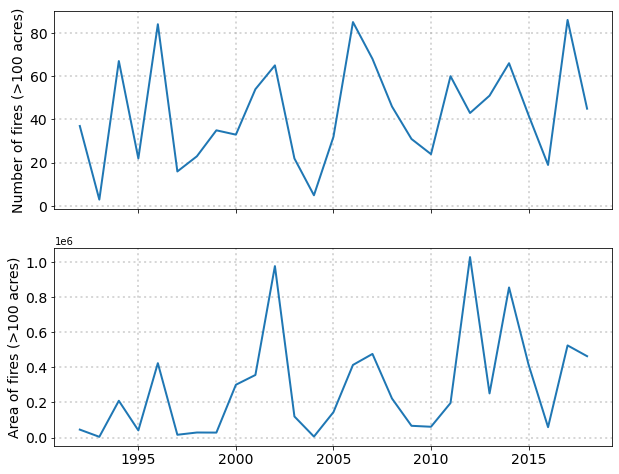

In [133]:
# Plot number and acres of wildfire for each year
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)
ax1.plot(large_fire_count, lw=2)
ax1.set_ylabel('Number of fires (>100 acres)', fontsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(ls='dotted', lw=2, alpha=0.5)

ax2.plot(large_fire_area, lw=2)
ax2.set_ylabel('Area of fires (>100 acres)', fontsize=14)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.grid(ls='dotted', lw=2, alpha=0.5)

*********

# Question 1 (20 points): 

Write a script (either in Spyder or as a Jupyter Notebook) to answer the following questions:

* a) Which Oregon county had the most **human** caused wildfires **>50 acres**?
* b) Which month had the most **natural** caused wildfires **>100 acres**?
* c) How many fires **>200 acres** have an undetermined cause (e.g. `Missing data/not specified/undetermined`?
* d) What is the name, date, and county of the largest sized fire?
* e) How many wildfires in Lane County?

**************

## Lab 2b: Where are wildfires occurring in Lane County Oregon?

So we have established that there were some fires in Lane County between 1992 and 2018. But what if we wanted to know more about where they were and how many people might have been affected? We can do this using Census Bureau data which provides population estimates at relatively small spatial scales. 

**Objectives:**
   * We will explore Census Bureau data using <code>cenpy</code>.
   * Learn about Census Bureau data variables and geographic units
   * Compute how many people were impacted by wildfires in Lane County, Oregon using just a few lines of code
   * Calculate some statistics using the <code>pandas</code> library
   * Export our data as a shapefile using <code>geopandas</code> 
   * Visualize our data in QGIS

We will be relying heavily on <code>cenpy</code> which is a package that enables automatic discovery and download of US Census Bureau data. <code>cenpy</code> formats Census data as a <code>geopandas</code> DataFrame for analysis in Python or export to GIS software such as QGIS. More information about this package can be found [here](https://nbviewer.org/github/ljwolf/cenpy/blob/master/notebooks/product-api.ipynb?flush_cache=true), [here](https://nbviewer.org/github/cenpy-devs/cenpy/blob/master/notebooks/segregation.ipynb), and the [GitHub repo](https://github.com/cenpy-devs/cenpy).

### Query Census data

Now we can start the assignment. As a first example, let's suppose we're interested in unemployment at the tract level in Lane County, Oregon. To download data, we first need to identify the relevant product and variables of interest to us. We will use data from the American Community Survey (ACS) product which provides social and economic information every year but, unlike the Decenniel Survey, only represents a sample (about 3.5 million) of US households. 

In [2]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

Now we need a list of Census variables. One way to do this is to browse the ACS documentation which can be found here: https://api.census.gov/data/2019/acs/acs5/variables.html. The other is to search the tables using keywords and <code>cenpy</code>.

In [3]:
# Print list of tables
acs.filter_tables('EMPLOYMENT', by='description')

,description,columns
table_name,,
B10058,EMPLOYMENT STATUS OF GRANDPARENTS LIVING WITH ...,"[B10058_001E, B10058_002E, B10058_003E, B10058..."
B14005,SEX BY SCHOOL ENROLLMENT BY EDUCATIONAL ATTAIN...,"[B14005_001E, B14005_002E, B14005_003E, B14005..."
B16010,EDUCATIONAL ATTAINMENT AND EMPLOYMENT STATUS B...,"[B16010_001E, B16010_002E, B16010_003E, B16010..."
B17005,POVERTY STATUS IN THE PAST 12 MONTHS OF INDIVI...,"[B17005_001E, B17005_002E, B17005_003E, B17005..."
B19053,SELF-EMPLOYMENT INCOME IN THE PAST 12 MONTHS F...,"[B19053_001E, B19053_002E, B19053_003E]"
B19063,AGGREGATE SELF-EMPLOYMENT INCOME IN THE PAST 1...,[B19063_001E]
B21005,AGE BY VETERAN STATUS BY EMPLOYMENT STATUS FOR...,"[B21005_001E, B21005_002E, B21005_003E, B21005..."
B23001,SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULA...,"[B23001_001E, B23001_002E, B23001_003E, B23001..."
B23003,PRESENCE OF OWN CHILDREN UNDER 18 YEARS BY AGE...,"[B23003_001E, B23003_002E, B23003_003E, B23003..."


In our case we are interested in the variable **B23025** which contains employment status for the population that is 16 years and over. 

In [4]:
# Print list of variables
acs.filter_variables('B23025')

,label,concept,predicateType,group,limit,predicateOnly,attributes,required
B23025_004E,Estimate!!Total:!!In labor force:!!Civilian la...,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_004EA,B23025_004M,B23025_004MA",NaN
B23025_005E,Estimate!!Total:!!In labor force:!!Civilian la...,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_005EA,B23025_005M,B23025_005MA",NaN
B23025_003E,Estimate!!Total:!!In labor force:!!Civilian la...,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_003EA,B23025_003M,B23025_003MA",NaN
B23025_002E,Estimate!!Total:!!In labor force:,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_002EA,B23025_002M,B23025_002MA",NaN
B23025_001E,Estimate!!Total:,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_001EA,B23025_001M,B23025_001MA",NaN
B23025_007E,Estimate!!Total:!!Not in labor force,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_007EA,B23025_007M,B23025_007MA",NaN
B23025_006E,Estimate!!Total:!!In labor force:!!Armed Forces,EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS ...,int,B23025,0,NaN,"B23025_006EA,B23025_006M,B23025_006MA",NaN


After identifying relevant variables, we can download the data and compute variables at the tract level which is the third smallest geographic unit in Census data. 

<div>
<img src="images/census_geographic_units.png" width="800"/>
</div>

### Download Census data and compute statistics

In [5]:
# Download data
lane = products.ACS(2019).from_county('Lane County, OR', level='tract',
                                        variables=['B23025_003E', 'B23025_005E']) # don't worry about the deprecation message!

# Compute unemployment percentage
lane['percent_unemployed'] = lane['B23025_005E'] / lane['B23025_003E'] * 100

/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` paramete

Now let’s look at some summary statistics.

In [6]:
# Caluclate some stats
lane['percent_unemployed'].describe()

count    86.000000
mean      6.914352
std       3.492321
min       1.193565
25%       4.665387
50%       6.242081
75%       8.644192
max      24.157303
Name: percent_unemployed, dtype: float64

### Plot

We can also plot this easily.

<AxesSubplot:>

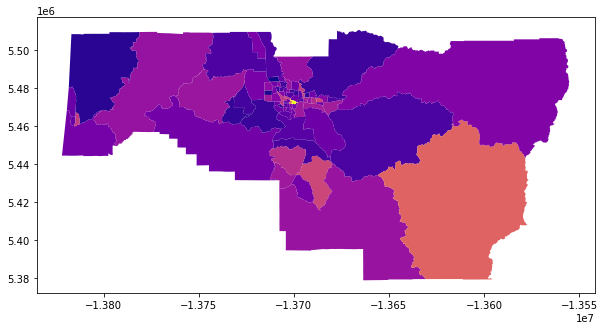

In [7]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
lane.plot('percent_unemployed', ax=ax, cmap='plasma')

### Save to file

But it is sometimes useful to export the data for viewing in GIS software.

In [ ]:
# Save to file
lane.to_file('/path/to/lane_unemployment.shp') # Note that you will have to change the path to your student folder

### Visualize data in QGIS

Open QGIS and install the **QuickMapServices** plugin which provides some basemaps for locating our data. If you haven't installed QGIS yet, you can so from the link here: https://qgis.org/en/site/forusers/download.html.

* **Plugins** --> **Manage and Install Plugins**
* Search for **QuickMapServices** and **Install Plugin**

When the plugin is installed, we will display the OpenStreetMap (OSM) basemap in our QGIS workspace. OSM is a free editable geographic database of the world. 

* **Web** --> **QuickMapServices** --> **OSM** --> **OSM Standard**

Add *lane_unemployment.shp* to your QGIS workspace and change the Symbology of the layer so that the unemployment data is represented by a colorscale.

*********

### Question 2 (20 points): 
* a) Write a script (either in Spyder or as a Jupyter Notebook) to produce your own chloropleth map for a city, county or state showing a Census variable (or derived variable) of your choice. *Note*: *if your map represents a state, use county level Census data, if your map represents a county or city, use tract or block group level data*.
* b) Export your data as a shapefile, import the shapefile into QGIS, edit the map so it looks nice and save as a .png file.

### Task 3 (10 points):
* a) Make a new Jupyter Notebook that includes your code (for both Lab 2a and 2b), your map, and a few sentences about what your map shows. 
* b) Push your answers notebook to GitHub using instructions from Lab 1
* c) Also upload your answers as a <code>.pdf</code> to Canvas

**************